In [23]:
import numpy as np
import matplotlib.pyplot as plt
# sklearn contains all of prepared dataset
from sklearn import datasets
# import keras to run on tf
import keras
# choose linear model
from keras.models import Sequential
# for hidden layers
from keras.layers import Dense
# gradient optimizer function
from keras.optimizers import Adam


In [24]:
# seed points to have the same random number eachtime the program runs
np.random.seed(0)

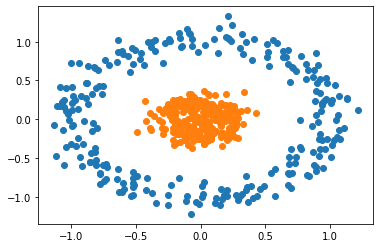

In [25]:
# number of points
n_pts = 500
"""
# create circle dataset labels
# '0' large circle (-)
# '1' small circle (+)
make_circles() doc
- n_samples : numbers of sample points 
- random_state : random numbers to seed the numbers generator
- noise : gaussian noise : low value less convoluted shape and easy to classify
- factor : diameter of the small circle based on large circle diameter size (%)
"""
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)
# print(X) 
# print(y)

# plot all X coordinators with label of zero (y=0)
plt.scatter(X[y==0, 0], X[y==0, 1])
# plot all X coordinators with label of one (y=1)
plt.scatter(X[y==1, 0], X[y==1, 1])

In [26]:
# create linear/sequential  DNN with keras
model = Sequential()
# four hidden layers; 2 input nodes: X1,X2 ; with sigmoid activation function 
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
# output layers with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))
# configure the model with learning rate : crossyentropy : metrics "similar to loss function" (accuracy)
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

# https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,1&seed=0.87706&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


In [27]:
# train the model : Trains the model for a fixed number of epochs (iterations on a dataset).

h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.3342
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.6304
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5714
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4365
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.6780
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5595
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.6791
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5512
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.6709
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.7630
Epoch 11/

Text(0.5, 0, 'epoch')

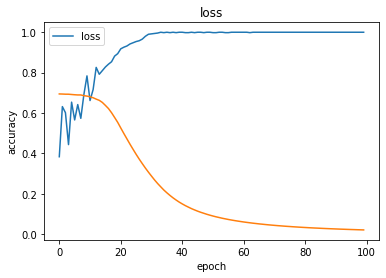

In [28]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [29]:
# show the final probability zone based on model prediction during each training
def plot_decision_boundary(X, y, model):
  """
  - X : input nodes
  - y : probabilities output
  - model : pretrained model
  """
  x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
  y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = np.c_[xx.ravel(), yy.ravel()]
  pred_func = model.predict(grid)
  # display distinct zone prediction probability level
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)


Prediction is:  [[0.02737104]]


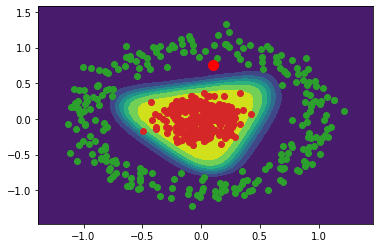

In [30]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

# display a new predicted point
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

# point coordinators
x = 0.1
y = 0.75

# give the new point to the trained model
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)

# every point outside the zone has the proba = 0
# every point inside the classfied zone the de model are = 1
# so the new point is outside the classification ZONE!!! which show that the model is working great!!!